In [4]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [5]:
 train_data=keras.utils.image_dataset_from_directory(
     directory="D:/datasets/pets/train",
     labels="inferred",
     label_mode="int",
     image_size=(256,256),
     batch_size=32,
     shuffle=False)   

Found 132 files belonging to 2 classes.


In [26]:
test_data=keras.utils.image_dataset_from_directory(
    directory="D:/datasets/pets/test",
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32,
    shuffle=False)


Found 70 files belonging to 2 classes.


In [28]:
type(test_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[[[222.86317 223.86317 217.86317]
  [222.52344 223.52344 217.52344]
  [222.29546 223.29546 217.29546]
  ...
  [234.42773 238.42773 241.42773]
  [243.92741 243.74837 248.33789]
  [242.73026 241.73026 246.73026]]

 [[221.57031 222.57031 216.57031]
  [221.57031 222.57031 216.57031]
  [222.      223.      217.     ]
  ...
  [235.57973 239.57973 242.57973]
  [245.05959 246.05959 250.05959]
  [246.4489  247.4489  251.4489 ]]

 [[219.61719 220.61719 214.61719]
  [220.47852 221.47852 215.47852]
  [221.26881 222.26881 216.26881]
  ...
  [233.91283 237.91283 240.91283]
  [239.93715 243.99023 246.99023]
  [241.89453 246.00444 249.00444]]

 ...

 [[216.57866 215.38725 221.37305]
  [210.88441 211.11879 215.58719]
  [207.73119 209.16673 209.86009]
  ...
  [213.      212.      207.     ]
  [216.      213.      208.     ]
  [216.      213.      208.     ]]

 [[207.73991 215.59148 218.45085]
  [207.99805 214.86716 217.35643]
  [204.35617 211.32191 210.1289

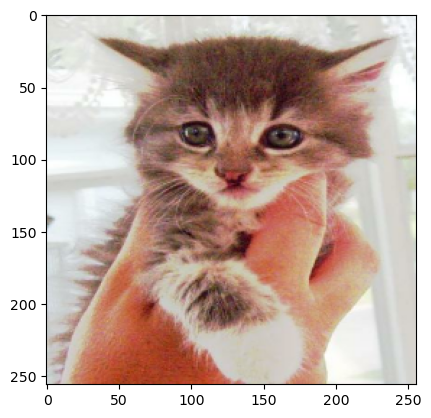

In [32]:
for images, labels in test_data:
    img=images[0]
    label=labels[0]
    print(label)
    print(img)
    plt.imshow(img.numpy().astype("uint8"))
    
    break
    

In [38]:
model=Sequential()

In [40]:
#make 1 convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(256,256,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size=(3,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#add flatten, hidden, output layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\HARMAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,755,425 (60.10 MB)

 Trainable params: 15,755,425 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_data.map(process)
test_ds = test_data.map(process)

In [46]:
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 860ms/step - accuracy: 0.4811 - loss: 1340.4084 - val_accuracy: 0.5000 - val_loss: 599.5886
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 702ms/step - accuracy: 0.4935 - loss: 429.7175 - val_accuracy: 0.5286 - val_loss: 14.9984
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step - accuracy: 0.4948 - loss: 14.4573 - val_accuracy: 0.5143 - val_loss: 3.0711
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 711ms/step - accuracy: 0.6484 - loss: 1.3296 - val_accuracy: 0.6286 - val_loss: 0.9911
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 704ms/step - accuracy: 0.8582 - loss: 0.3889 - val_accuracy: 0.6143 - val_loss: 0.9901


In [52]:
img=cv2.imread("D:/datasets/pets/test/cats/66.jpg")

In [54]:
type(img)

numpy.ndarray

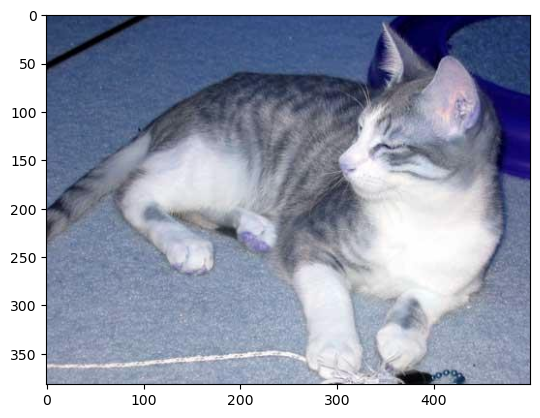

In [56]:
plt.imshow(img)

In [62]:

img_up = cv2.resize(img, (256,256))
img_up = img_up / 255.0 
img = img_up.reshape(1,256,256,3)

In [64]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


array([[0.50514793]], dtype=float32)

In [66]:
#prob>0.5 dog
#prob<0.5 cat

In [68]:
for images, labels in test_data:
    prediction=model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [70]:
prediction #it will give predictions of only last batch

array([[9.7620183e-01],
       [7.8909194e-01],
       [5.4670067e-04],
       [8.1565154e-01],
       [9.9736941e-01],
       [8.0301827e-01]], dtype=float32)

In [72]:
pred=[]
for images, labels in test_data:
    prediction=model.predict(images)
    for i in prediction:
        if i<0.5:
            pred.append(0)
        if i>0.5:
            pred.append(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [74]:
len(pred)

70

In [78]:
label=[]
for images, labels in test_data:
    label.extend(labels.numpy().tolist())
    

In [82]:
len(label)

70

In [88]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
accuracy_score(pred, label)

0.6142857142857143

In [86]:
precision_score(pred, label)

0.8571428571428571

In [90]:
confusion_matrix(pred, label)

array([[13,  5],
       [22, 30]], dtype=int64)